In [259]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import os

In [260]:
def plot_trajectory(traj_df, robot_name, axes, time_col='ros_time_sec', desired_color='blue', actual_color='orange'):
    # plot x position
    axes[0].plot(traj_df[time_col].to_numpy(), traj_df[f'des_{robot_name}_x'].to_numpy(), linestyle='--', color=desired_color)
    axes[0].plot(traj_df[time_col].to_numpy(), traj_df[f'act_{robot_name}_x'].to_numpy(), linestyle='-', color=actual_color)
    axes[0].set_ylabel("X Position (m)")
    axes[0].set_title(f"{robot_name} Trajectory")
    axes[0].legend()

    # plot y position
    axes[1].plot(traj_df[time_col].to_numpy(), traj_df[f'des_{robot_name}_y'].to_numpy(), linestyle='--', color=desired_color)
    axes[1].plot(traj_df[time_col].to_numpy(), traj_df[f'act_{robot_name}_y'].to_numpy(), linestyle='-', color=actual_color)
    axes[1].set_ylabel("Y Position (m)")
    axes[1].legend()
    
    # plot theta
    axes[2].plot(traj_df[time_col].to_numpy(), traj_df[f'des_{robot_name}_theta'].to_numpy(), linestyle='--', color=desired_color)
    axes[2].plot(traj_df[time_col].to_numpy(), traj_df[f'act_{robot_name}_theta'].to_numpy(), linestyle='-', color=actual_color)
    axes[2].set_ylabel("Theta (rad)")
    axes[2].legend()

In [261]:
def print_max_errors(traj_df):
    for robot in ['ross', 'mon']:
        print(f"{robot}:")
        max_x_error = np.max(np.abs(traj_df[f'des_{robot}_x'] - traj_df[f'act_{robot}_x']))
        max_y_error = np.max(np.abs(traj_df[f'des_{robot}_y'] - traj_df[f'act_{robot}_y']))
        max_theta_error = np.max(np.abs(traj_df[f'des_{robot}_theta'] - traj_df[f'act_{robot}_theta']))
        print(f"  Max X Error: {max_x_error:.4f} m")
        print(f"  Max Y Error: {max_y_error:.4f} m")
        print(f"  Max Theta Error: {max_theta_error:.4f} rad")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ross:
  Max X Error: 0.0363 m
  Max Y Error: 0.0355 m
  Max Theta Error: 0.0591 rad
mon:
  Max X Error: 0.0504 m
  Max Y Error: 0.0784 m
  Max Theta Error: 0.0937 rad


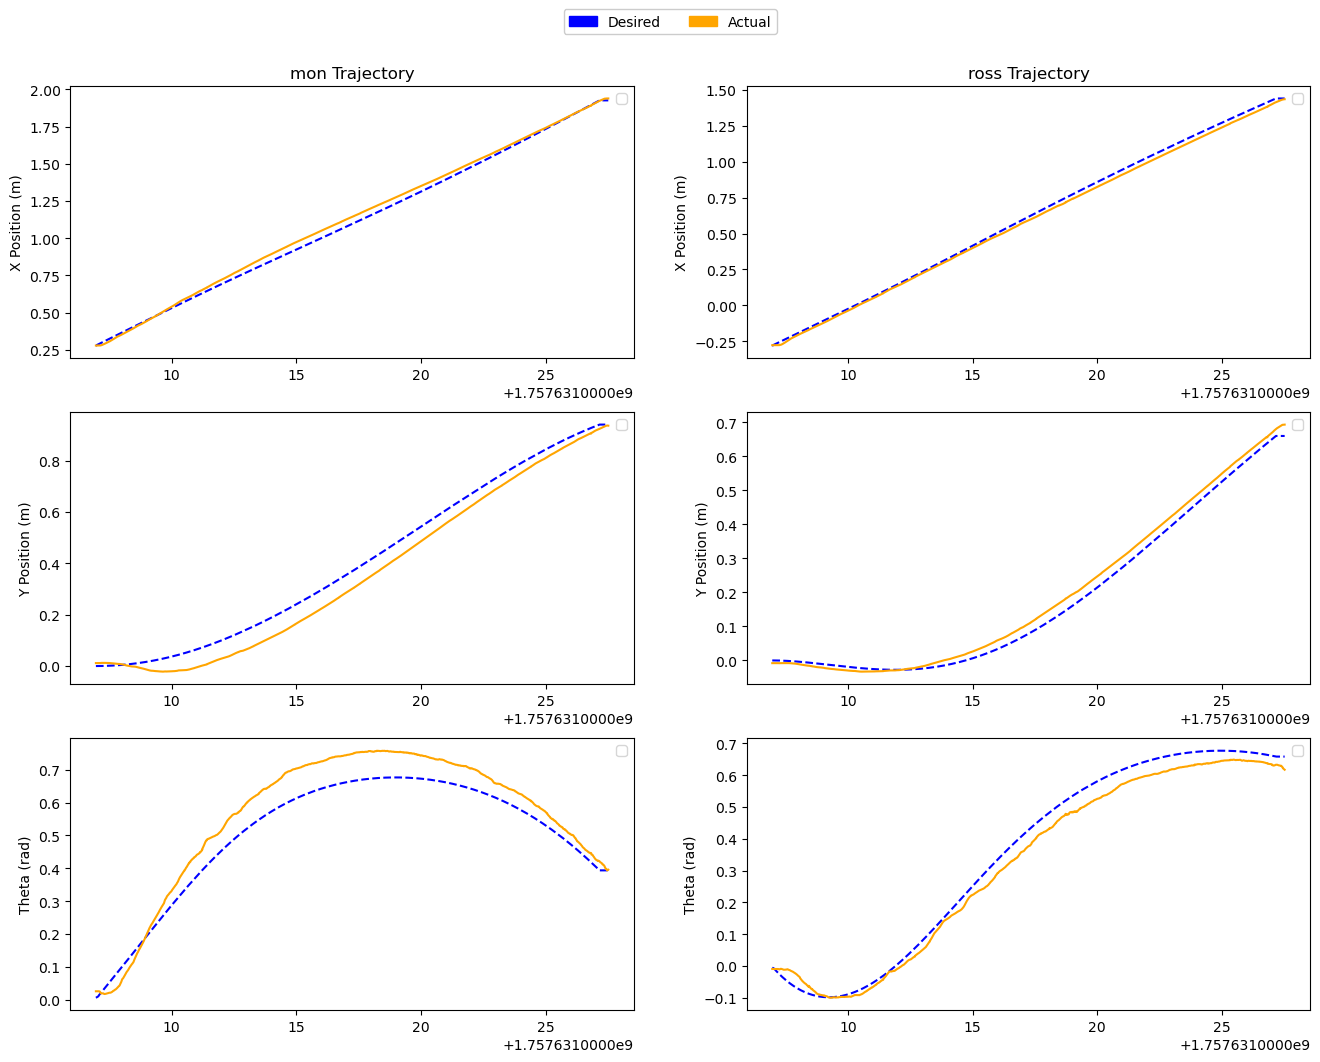

In [262]:
trial_name = 'test_trial'
file_path = f'../data/{trial_name}/trajectory_data.csv'
time_col = 'ros_time_sec'

traj_df = pd.read_csv(file_path)

# left side monica, right side ross 
fig, axes = plt.subplots(3, 2, figsize=(16, 12))
desired_color = 'blue'
actual_color = 'orange'

# add legend to the top
legend_handles = [
    mpatches.Patch(label='Desired', color=desired_color),
    mpatches.Patch(label='Actual', color=actual_color),
]
fig.legend(
    handles=legend_handles,
    loc='upper center',  # Move legend to the top bar
    bbox_to_anchor=(0.5, 0.95),  # Center above the plot
    ncol=2,  # Spread legend entries horizontally
    # title='Color Association',
    framealpha=1.0
)

plot_trajectory(traj_df, 'mon', axes[:, 0])
plot_trajectory(traj_df, 'ross', axes[:, 1])

print_max_errors(traj_df)

plt.show()